In [72]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import numpy as np

In [73]:
df = pd.read_csv("D:\\python\\clone\\DataMiningwithPython\\Session02\\association_rules_data_set.csv")

In [74]:
df.head()

,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,8.71,Short,M,No,53,1,0,0,0,0,0,0
1,5.24,Medium,F,No,31,0,0,0,0,0,1,1
2,4.22,Medium,M,No,42,1,1,0,0,1,0,0
3,4.81,Long,F,No,30,0,0,0,0,0,0,0
4,3.95,Long,M,Yes,29,0,0,0,1,1,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Elapsed_Time       3483 non-null   float64
 1   Time_in_Community  3483 non-null   object 
 2   Gender             3483 non-null   object 
 3   Working            3483 non-null   object 
 4   Age                3483 non-null   int64  
 5   Family             3483 non-null   int64  
 6   Hobbies            3483 non-null   int64  
 7   Social_Club        3483 non-null   int64  
 8   Political          3483 non-null   int64  
 9   Professional       3483 non-null   int64  
 10  Religious          3483 non-null   int64  
 11  Support_Group      3483 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 326.7+ KB


In [76]:
df.describe(include="all")

,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
count,3483.000000,3483,3483,3483,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000
unique,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Long,F,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1465,1790,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.921786,NaN,NaN,NaN,36.759403,0.389894,0.300029,0.188056,0.093885,0.324433,0.418605,0.158771
std,2.293446,NaN,NaN,NaN,10.794546,0.487796,0.458336,0.390813,0.291710,0.468230,0.493401,0.365515
min,2.010000,NaN,NaN,NaN,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.875000,NaN,NaN,NaN,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.930000,NaN,NaN,NaN,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.840000,NaN,NaN,NaN,46.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000


In [77]:
for i in df.columns:
    print(f'{i:30s}>>> {df[i].unique()}')

Elapsed_Time                  >>> [ 8.71  5.24  4.22  4.81  3.95  9.35  2.91  4.54  4.79  3.07  2.2   2.77
  7.32  2.23  2.13  7.15  8.63  3.77  6.52  6.42  7.4   6.33  4.45  6.1
  3.19  6.62  8.57  9.04  9.97  8.12  7.96  2.95  6.2   2.17  5.85  9.42
  6.66  7.88  7.53  5.43  5.71  8.44  2.42  2.67  4.03  7.9   6.44  8.77
  8.49  2.3   2.14  9.96  9.76  3.17  5.31  9.26  5.07  5.28  7.16  6.23
  5.89  6.26  9.3   3.67  7.49  4.58  7.25  4.88  9.12  7.7   3.99  7.76
  9.72  5.9   5.08  5.65  9.75  9.66  3.49  3.18  6.88  2.88  3.39  7.22
  7.91  3.8   6.53  7.24  3.4   2.08  2.66  5.97  4.06  4.71  6.6   4.65
  5.13  4.76  7.71  4.82  5.63  5.21  3.96  7.46  2.24  2.18  4.16  8.66
  3.69  5.03  7.95  3.37  8.58  2.85  3.82  3.84  3.1   2.16  7.97  2.46
  6.11  7.84  2.83  6.37  8.67  3.01  5.42  7.92  3.65  9.84  6.79  6.21
  5.51  6.38  3.74  6.45  4.3   8.8   5.47  2.27  3.6   2.31  5.62  3.
  2.81  6.43  9.24  8.31  8.47  5.99  4.49 10.04  4.13  6.41  8.65  6.95
  8.19  9.06  6.3   

In [78]:
from collections import Counter
Counter(df.Working)

Counter({'No': 1739, 'Yes': 1744})

In [79]:
# using get_dummies
df = pd.get_dummies(df,columns=['Time_in_Community','Working','Gender'])
df

,Elapsed_Time,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group,Time_in_Community_Long,Time_in_Community_Medium,Time_in_Community_Short,Working_No,Working_Yes,Gender_F,Gender_M
0,8.71,53,1,0,0,0,0,0,0,0,0,1,1,0,0,1
1,5.24,31,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2,4.22,42,1,1,0,0,1,0,0,0,1,0,1,0,0,1
3,4.81,30,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,3.95,29,0,0,0,1,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,9.00,51,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3479,9.48,21,0,0,0,0,0,1,0,0,1,0,0,1,1,0
3480,8.36,49,0,1,0,0,0,1,1,1,0,0,1,0,0,1
3481,7.34,46,1,1,1,0,1,1,0,1,0,0,0,1,1,0


#here i didnt know this trick.
#i say again use get_dummins



df.Working.replace("No",0,inplace=True)
df.Working.replace("Yes",1,inplace=True)


for j in ['Short','Medium','Long']:
    i = j+"_Time_in_Community"
    df[i]=df["Time_in_Community"][df.Time_in_Community == j]
    df[i].replace(j,1,inplace=True)
    df[i].fillna(0,inplace=True)
    df[i] = df[i].astype("int64")

df

df.rename(columns={"Gender":"Is_a_man"},inplace = True)
df.Is_a_man.replace({"M":1,"F":0},inplace = True)

lets countinue

In [82]:
import matplotlib.pyplot as plt

count    3483.000000
mean       36.759403
std        10.794546
min        17.000000
25%        27.000000
50%        36.000000
75%        46.000000
max       142.000000
Name: Age, dtype: float64

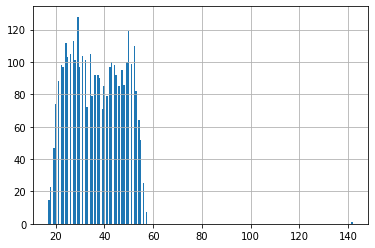

In [83]:
df.Age.hist(bins=200)
df.Age.describe()

In [84]:
#or use apply
df["Age"] = np.where(df["Age"]<30,"young",np.where(df["Age"]<60,"adult","old"))


In [85]:
Counter(df["Age"])

Counter({'adult': 2378, 'young': 1104, 'old': 1})

In [87]:
df = pd.get_dummies(df,columns=["Age"])

In [88]:
df

,Elapsed_Time,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group,Time_in_Community_Long,Time_in_Community_Medium,Time_in_Community_Short,Working_No,Working_Yes,Gender_F,Gender_M,Age_adult,Age_old,Age_young
0,8.71,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
1,5.24,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0
2,4.22,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
3,4.81,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,3.95,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,9.00,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
3479,9.48,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
3480,8.36,0,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0
3481,7.34,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0


(<AxesSubplot:>,
 count    3483.000000
 mean        5.921786
 std         2.293446
 min         2.010000
 25%         3.875000
 50%         5.930000
 75%         7.840000
 max        10.150000
 Name: Elapsed_Time, dtype: float64)

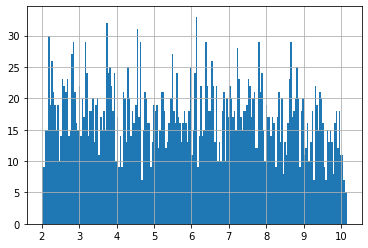

In [90]:
df.Elapsed_Time.hist(bins=200),df.Elapsed_Time.describe()

In [91]:
df.Elapsed_Time = np.where(df.Elapsed_Time<=4,"1-4h",np.where(df.Elapsed_Time<=8,"4-8h","8-10h"))

In [94]:
df = pd.get_dummies(df,columns=["Elapsed_Time"])

In [135]:
df.drop(["Working_No"],axis=1,inplace=True)

الان که دیتا تمیزه بریم روش اسوشیت رولز رو بزنیم

In [136]:
df = df.astype("bool")
#سرعت با بولین خیلی بیشتره

In [137]:
from mlxtend.frequent_patterns import apriori,association_rules
support_checking = apriori(df, min_support=.3,use_colnames=True)
support_checking

,support,itemsets
0,0.389894,(Family)
1,0.300029,(Hobbies)
2,0.324433,(Professional)
3,0.418605,(Religious)
4,0.420614,(Time_in_Community_Long)
5,0.374390,(Time_in_Community_Medium)
6,0.500718,(Working_Yes)
7,0.513925,(Gender_F)
8,0.486075,(Gender_M)
9,0.682745,(Age_adult)


In [140]:
rules = association_rules(support_checking,metric="confidence",min_threshold=.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Working_Yes),(Age_adult),0.500718,0.682745,0.333333,0.665711,0.975051,-0.008529,0.949045
1,(Age_adult),(Gender_F),0.682745,0.513925,0.355441,0.520606,1.013000,0.004561,1.013936
2,(Gender_F),(Age_adult),0.513925,0.682745,0.355441,0.691620,1.013000,0.004561,1.028781
3,(Gender_M),(Age_adult),0.486075,0.682745,0.327304,0.673361,0.986256,-0.004561,0.971271
4,(Elapsed_Time_4-8h),(Age_adult),0.503589,0.682745,0.335630,0.666477,0.976172,-0.008192,0.951223


In [142]:
rules[(rules.lift>1)|(rules.lift<1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Working_Yes),(Age_adult),0.500718,0.682745,0.333333,0.665711,0.975051,-0.008529,0.949045
1,(Age_adult),(Gender_F),0.682745,0.513925,0.355441,0.520606,1.013000,0.004561,1.013936
2,(Gender_F),(Age_adult),0.513925,0.682745,0.355441,0.691620,1.013000,0.004561,1.028781
3,(Gender_M),(Age_adult),0.486075,0.682745,0.327304,0.673361,0.986256,-0.004561,0.971271
4,(Elapsed_Time_4-8h),(Age_adult),0.503589,0.682745,0.335630,0.666477,0.976172,-0.008192,0.951223
